In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

In [2]:
df = pd.read_csv('fitness class.csv')
df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [4]:
df.describe()

,booking_id,months_as_member,weight,attended
count,1500.000000,1500.000000,1480.000000,1500.000000
mean,750.500000,15.628667,82.610378,0.302667
std,433.157015,12.926543,12.765859,0.459565
min,1.000000,1.000000,55.410000,0.000000
25%,375.750000,8.000000,73.490000,0.000000
50%,750.500000,12.000000,80.760000,0.000000
75%,1125.250000,19.000000,89.520000,1.000000
max,1500.000000,148.000000,170.520000,1.000000


In [5]:
df.shape

(1500, 8)

### Null Values


In [6]:
df.isnull().sum()

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64

In [7]:
#replace null values in weight column with thier median

In [8]:
df['weight'] = df['weight'].fillna(df['weight'].median())

In [9]:
df.isnull().sum()

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64

In [10]:
df.duplicated().sum()

0

## Encoding

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1500 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [12]:
# object ----- days_before, day_of_week, time, category 

In [13]:
for i in list(df.select_dtypes(include = 'object').columns):
    print(df[i].value_counts())
    print('**************'*5)

10         293
2          199
8          194
12         178
14         172
4          154
6           70
7           38
3           31
5           30
11          26
13          25
15          24
9           24
1            9
10 days      6
14 days      3
12 days      3
6 days       3
4 days       3
16           3
17           3
20           1
2 days       1
5 days       1
7 days       1
8 days       1
1 days       1
3 days       1
13 days      1
29           1
Name: days_before, dtype: int64
**********************************************************************
Fri          279
Thu          241
Mon          218
Sun          213
Sat          202
Tue          195
Wed           81
Wednesday     35
Fri.          26
Monday        10
Name: day_of_week, dtype: int64
**********************************************************************
AM    1141
PM     359
Name: time, dtype: int64
**********************************************************************
HIIT        667
Cycling     376
Strength 

In [14]:
# days_before column have some mixed data, so filtering that data using regex

In [15]:
import re
#days_before = df['days_before'].apply(lambda x: re.findall(r'\d+',str(x)))
# Assuming 'df' is your DataFrame and 'days_before' is the column name
df['days_before'] = df['days_before'].apply(lambda x: int(re.findall(r'\d+', str(x))[0]) if re.findall(r'\d+', str(x)) else None)


In [16]:
for i in list(df.select_dtypes(include = 'object').columns):
    print(df[i].value_counts())
    print('**************'*5)

Fri          279
Thu          241
Mon          218
Sun          213
Sat          202
Tue          195
Wed           81
Wednesday     35
Fri.          26
Monday        10
Name: day_of_week, dtype: int64
**********************************************************************
AM    1141
PM     359
Name: time, dtype: int64
**********************************************************************
HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
-            13
Name: category, dtype: int64
**********************************************************************


In [17]:
# day_of_week column have some mixed data, so filtering that data using regex

In [18]:

df['day_of_week'] = df['day_of_week'].apply(lambda x:re.findall(r'\w{3}+',str(x))[0]) 
df['day_of_week'].value_counts()


Fri    305
Thu    241
Mon    228
Sun    213
Sat    202
Tue    195
Wed    116
Name: day_of_week, dtype: int64

In [19]:
for i in list(df.select_dtypes(include = 'object').columns):
    print(df[i].value_counts())
    print('**************'*5)


Fri    305
Thu    241
Mon    228
Sun    213
Sat    202
Tue    195
Wed    116
Name: day_of_week, dtype: int64
**********************************************************************
AM    1141
PM     359
Name: time, dtype: int64
**********************************************************************
HIIT        667
Cycling     376
Strength    233
Yoga        135
Aqua         76
-            13
Name: category, dtype: int64
**********************************************************************


In [20]:
df[df['category'] == '-']

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
55,56,17,71.35,4,Tue,PM,-,0
404,405,8,84.64,8,Thu,AM,-,0
430,431,7,90.60,12,Sat,AM,-,0
581,582,5,101.35,2,Mon,AM,-,0
642,643,28,83.59,14,Sun,AM,-,1
704,705,5,103.17,12,Sat,AM,-,0
735,736,8,81.56,2,Mon,AM,-,0
1019,1020,11,68.87,10,Fri,AM,-,0
1104,1105,13,77.43,10,Fri,AM,-,0
1197,1198,12,74.04,4,Tue,PM,-,0


In [21]:
# There is one unknown category called "-", since it have only 13 rows, so lets replace it with the mode i.e = "HIIT"

In [22]:
category = np.where(df['category'] == "-",df['category'].mode()[0],df['category'])

In [23]:
category

array(['Strength', 'HIIT', 'Strength', ..., 'HIIT', 'Aqua', 'Cycling'],
      dtype=object)

In [24]:
df['category'] = category
df['category'].value_counts()

HIIT        680
Cycling     376
Strength    233
Yoga        135
Aqua         76
Name: category, dtype: int64

In [25]:
for i in list(df.select_dtypes(include = 'object').columns):
    print(df[i].value_counts())
    print('**************'*5)

Fri    305
Thu    241
Mon    228
Sun    213
Sat    202
Tue    195
Wed    116
Name: day_of_week, dtype: int64
**********************************************************************
AM    1141
PM     359
Name: time, dtype: int64
**********************************************************************
HIIT        680
Cycling     376
Strength    233
Yoga        135
Aqua         76
Name: category, dtype: int64
**********************************************************************


## EDA

In [82]:
df1.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


<Axes: xlabel='weight', ylabel='Count'>

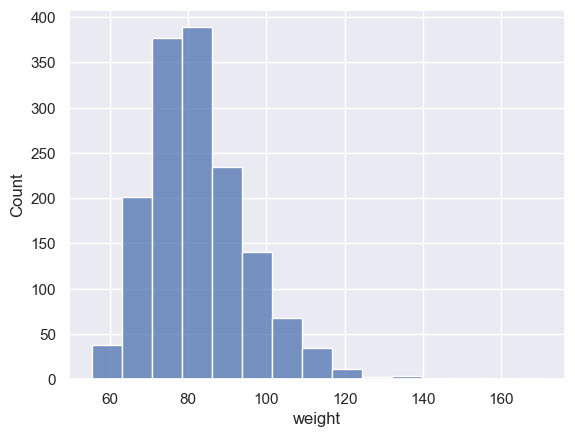

In [89]:
sns.histplot(df1['weight'],bins = 15)

<Axes: ylabel='1'>

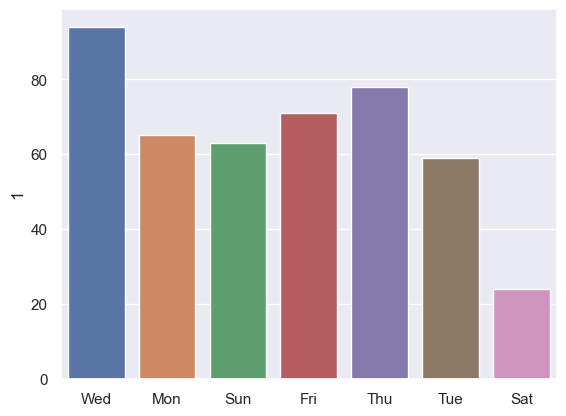

In [100]:
sns.barplot(x = df1['day_of_week'].unique(),y = df1.groupby('day_of_week')['attended'].value_counts().unstack()[1])

In [ ]:
# Wednesday and Thursday seems to be busiest of all days
# (as saturday is the least populated day) which is contradicting because generally weekends are the busiest

In [101]:
eda_df = df1.copy()
eda_df.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0


## Weight Groups -- 55-70, 70-90, 90-105, <105

In [108]:
def weight(val):
    if val >= 55 and val <= 70:
        return '55-70'
    elif val >= 71 and val <= 90:
        return '71-90'
    elif val >=91 and val <=105:
        return '91-105'
    elif val >=106 :
        return '<106'
eda_df['weight_group'] = eda_df['weight'].apply(weight)



In [109]:
eda_df['weight_group'].value_counts() 

71-90     901
91-105    240
55-70     216
<106       74
Name: weight_group, dtype: int64

<Axes: ylabel='1'>

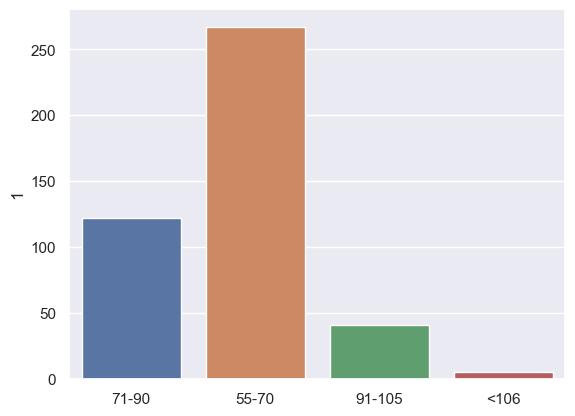

In [118]:
sns.barplot(x = list(eda_df['weight_group'].unique())[:-1],
            y = eda_df.groupby('weight_group')['attended'].value_counts().unstack()[1])

In [ ]:
#People with less weight are more likely to attend the class

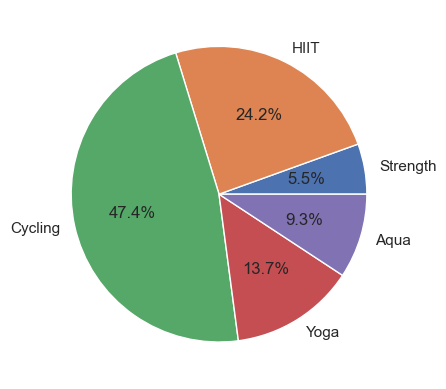

In [124]:
plt.pie(eda_df.groupby('category')['attended'].value_counts().unstack()[1],labels = eda_df['category'].unique(),
       autopct = '%1.1f%%')
plt.show()

In [ ]:
#Most people attend the cycling class and least people attend the Strenth class

In [127]:
eda_df['months_as_member'].describe()

count    1500.000000
mean       15.628667
std        12.926543
min         1.000000
25%         8.000000
50%        12.000000
75%        19.000000
max       148.000000
Name: months_as_member, dtype: float64

## New Members (1-12 Months)
## Intermediate Members (13-24 Months)
## Long-Term Members (24-72 Months)
## Veteran Members (73+ Months)

In [128]:
def month(val):
    if val >= 1 and val <= 12:
        return 'New Member'
    elif val >= 13 and val <= 24:
        return 'Intermediate Member'
    elif val >=24 and val <=72:
        return 'Long Term Member'
    elif val >=73 :
        return 'Veteran Member'
eda_df['month_joined_group'] = eda_df['months_as_member'].apply(month)

eda_df['month_joined_group'].value_counts()

New Member             779
Intermediate Member    496
Long Term Member       214
Veteran Member          11
Name: month_joined_group, dtype: int64

<Axes: ylabel='1'>

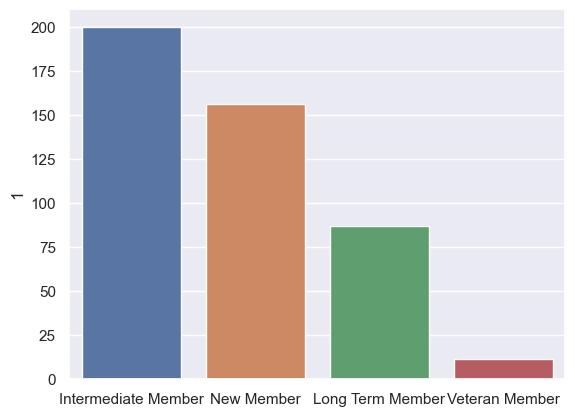

In [136]:
sns.barplot(x = eda_df['month_joined_group'].unique(),
            y = eda_df.groupby('month_joined_group')['attended'].value_counts().unstack()[1],)

In [ ]:
# Intermediate members are more active one, surpassing the new members
# Interestingly Veteran and long term members dont attend the class as often as others

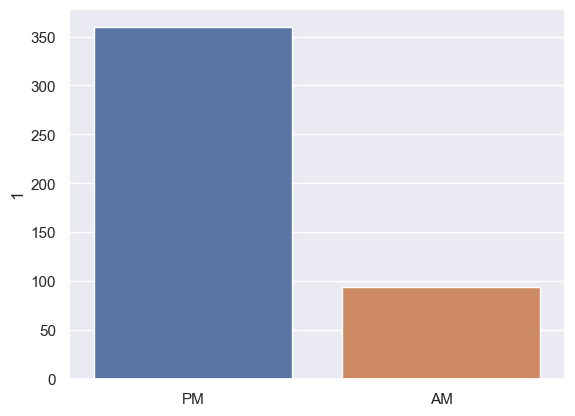

In [134]:
sns.barplot(x = eda_df['time'].unique(), y = eda_df.groupby('time')['attended'].value_counts().unstack()[1])
plt.show()

In [ ]:
# People generally attend sessions in the evening

In [ ]:
# Keys Points

# Wednesday and Thursday seems to be busiest of all days
# (as saturday is the least populated day) which is contradicting because generally weekends are the busiest
# People with less weight are more likely to attend the class
# Most people attend the cycling class and least people attend the Strenth class
# Intermediate members are more active one, surpassing the new members
# Interestingly Veteran and long term members dont attend the class as often as others
# People generally attend sessions in the evening

In [26]:
#Applying onehot encoding

In [27]:
dummies = pd.get_dummies(data = df[['day_of_week','time','category']],prefix = ['day_of_week','time','category'],
                        drop_first = True,columns = ['day_of_week','time','category'])
dummies

,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,time_PM,category_Cycling,category_HIIT,category_Strength,category_Yoga
0,0,0,0,0,0,1,1,0,0,1,0
1,1,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1495,0,0,0,0,0,0,0,0,1,0,0
1496,1,0,0,0,0,0,0,0,0,1,0
1497,0,0,0,0,1,0,0,0,1,0,0
1498,0,0,1,0,0,0,0,0,0,0,0


In [28]:
df1 = df.copy()

In [29]:
df2 = pd.concat([df1,dummies],axis = 1)

In [30]:
df2.head()

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,time_PM,category_Cycling,category_HIIT,category_Strength,category_Yoga
0,1,17,79.56,8,Wed,PM,Strength,0,0,0,0,0,0,1,1,0,0,1,0
1,2,10,79.01,2,Mon,AM,HIIT,0,1,0,0,0,0,0,0,0,1,0,0
2,3,16,74.53,14,Sun,AM,Strength,0,0,0,1,0,0,0,0,0,0,1,0
3,4,5,86.12,10,Fri,AM,Cycling,0,0,0,0,0,0,0,0,1,0,0,0
4,5,15,69.29,8,Thu,AM,HIIT,0,0,0,0,1,0,0,0,0,1,0,0


In [31]:
#Dropping some non significant columns

In [32]:
df2 = df2.drop(columns = ['booking_id','day_of_week','time','category'])

In [33]:
df2.describe()

,months_as_member,weight,days_before,attended,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,time_PM,category_Cycling,category_HIIT,category_Strength,category_Yoga
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,15.628667,82.585707,8.346667,0.302667,0.152000,0.134667,0.142000,0.160667,0.130000,0.077333,0.239333,0.250667,0.453333,0.155333,0.090000
std,12.926543,12.682188,4.077938,0.459565,0.359141,0.341481,0.349167,0.367346,0.336416,0.267209,0.426819,0.433541,0.497983,0.362343,0.286277
min,1.000000,55.410000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,73.562500,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,80.760000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19.000000,89.382500,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,148.000000,170.520000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking outliers and multicollinearity

Months_as_member



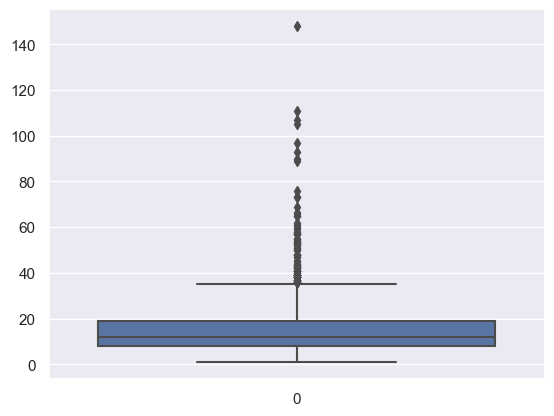

******************************************************************************************
Weight



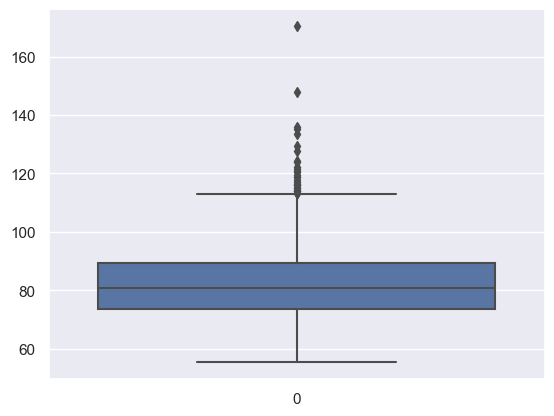

******************************************************************************************
Days_before



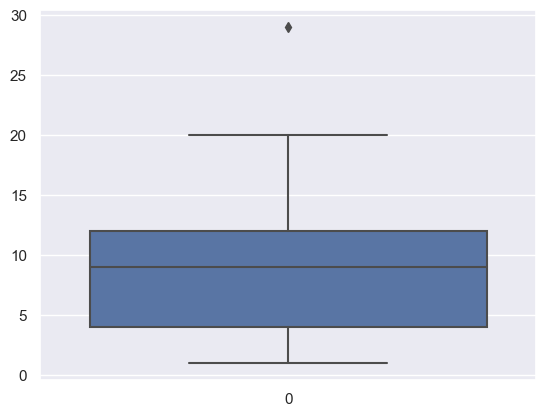

******************************************************************************************
Attended



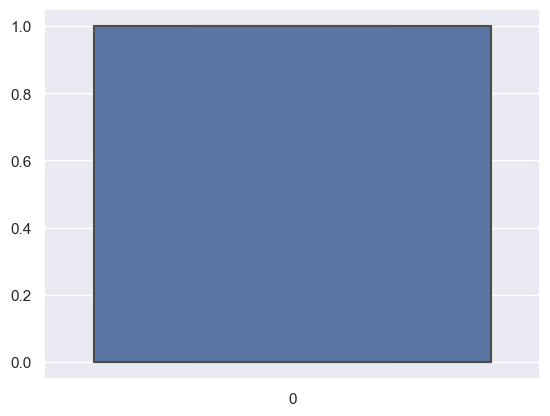

******************************************************************************************
Day_of_week_mon



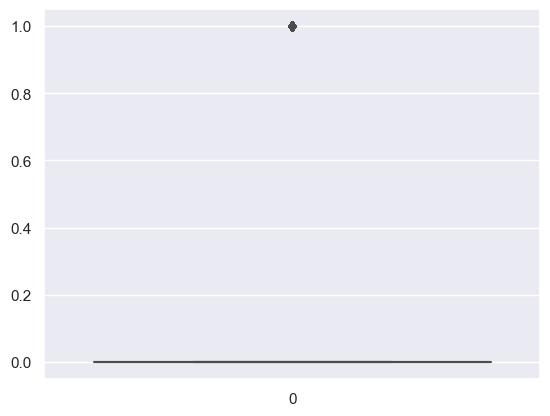

******************************************************************************************
Day_of_week_sat



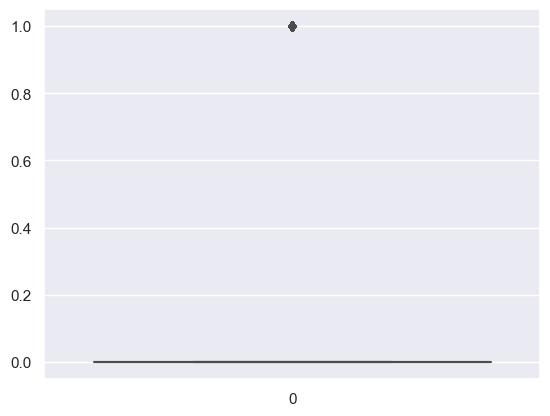

******************************************************************************************
Day_of_week_sun



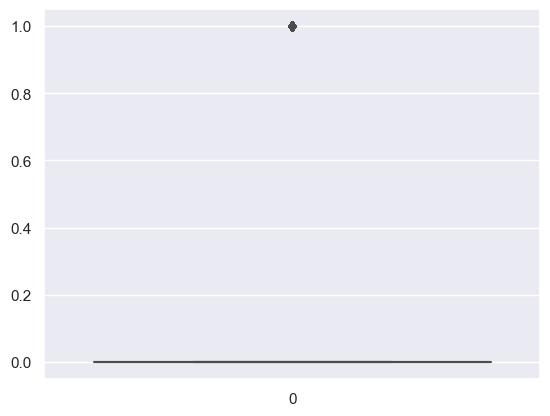

******************************************************************************************
Day_of_week_thu



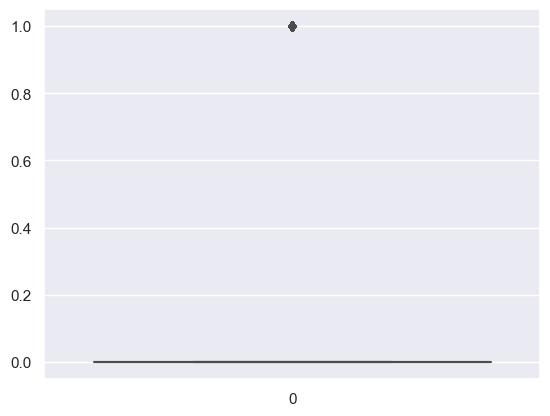

******************************************************************************************
Day_of_week_tue



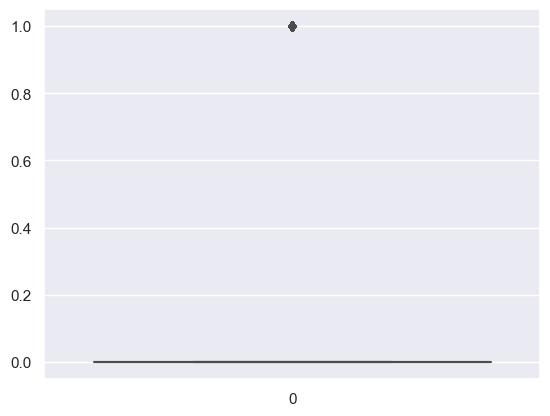

******************************************************************************************
Day_of_week_wed



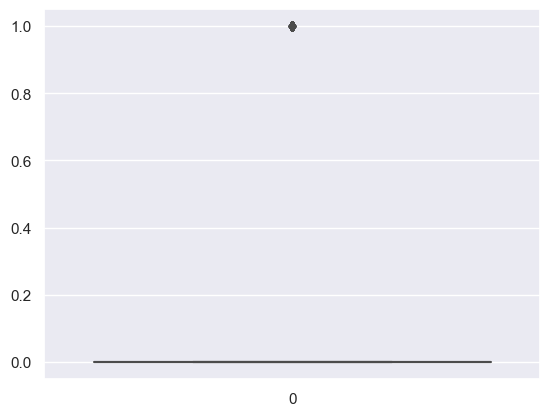

******************************************************************************************
Time_pm



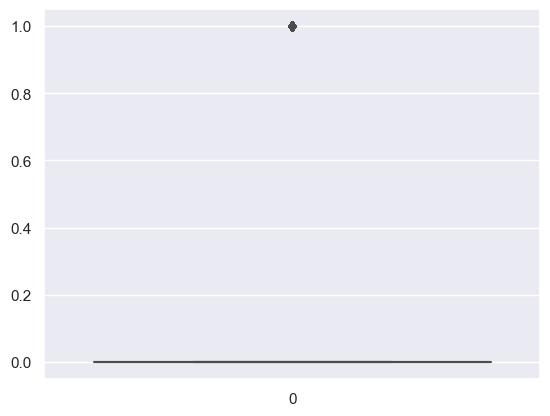

******************************************************************************************
Category_cycling



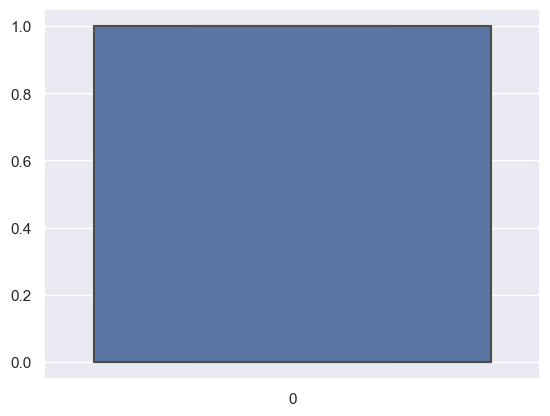

******************************************************************************************
Category_hiit



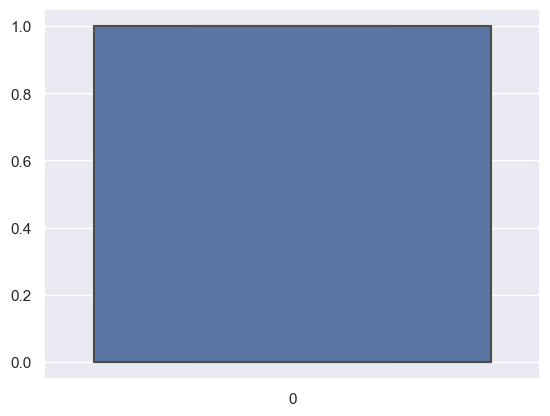

******************************************************************************************
Category_strength



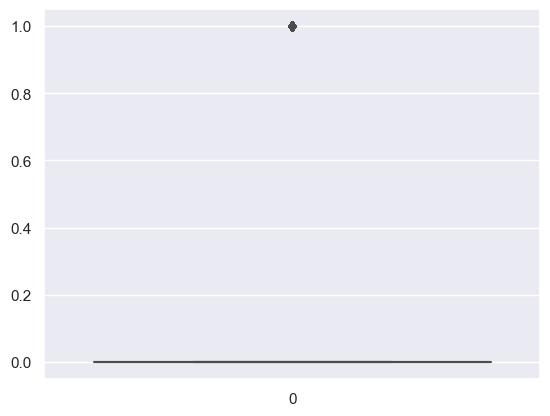

******************************************************************************************
Category_yoga



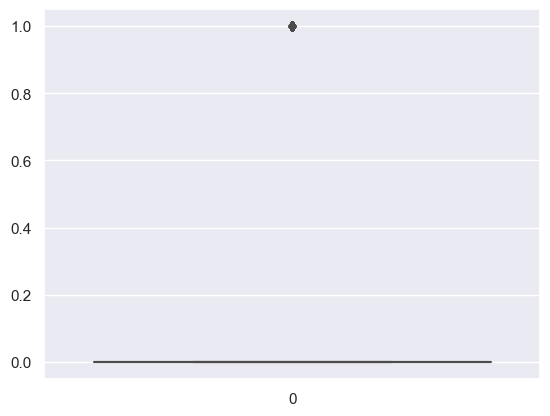

******************************************************************************************


In [34]:
def boxplot(columns):
    sns.boxplot(df2[columns])
for i in list(df2.columns):
    print(i.capitalize())
    print()
    boxplot(i)
    plt.show()
    print('*********'*10)

In [35]:
#using IQR Method to deal with outliers
q1 = df2['months_as_member'].quantile(0.25)
q3 = df2['months_as_member'].quantile(0.75)
iqr = q3 - q1
positive_out = q3 + 1.5*iqr
negative_out = q1 - 1.5*iqr
df3 = df2[~((df2['months_as_member']  <= negative_out) | (df2['months_as_member'] >= positive_out))]

In [36]:
#using IQR Method to deal with outliers
q1 = df2['weight'].quantile(0.25)
q3 = df2['weight'].quantile(0.75)
iqr = q3 - q1
positive_out = q3 + 1.5*iqr
negative_out = q1 - 1.5*iqr
df3 = df3[~((df2['weight']  <= negative_out) | (df2['weight'] >= positive_out))]

In [37]:
df3.shape

(1367, 15)

Months_as_member



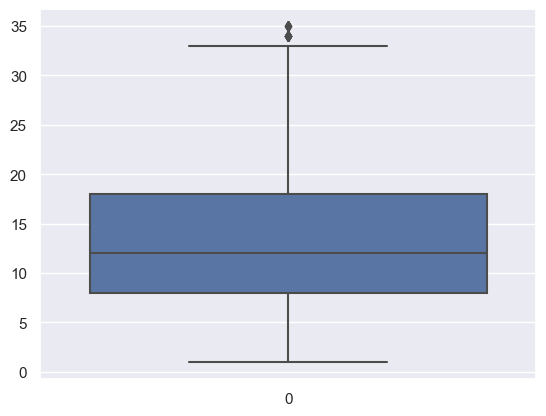

******************************************************************************************
Weight



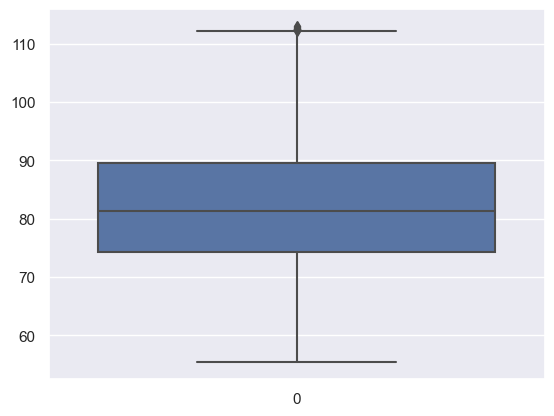

******************************************************************************************
Days_before



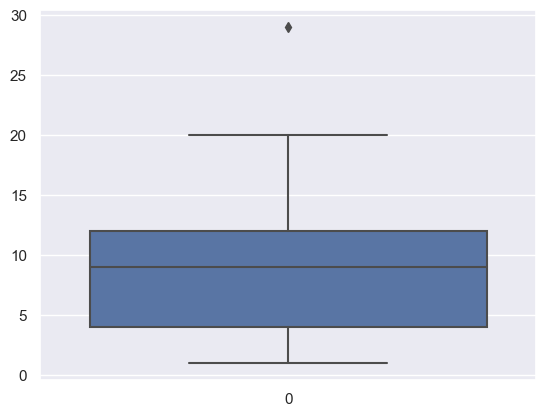

******************************************************************************************
Attended



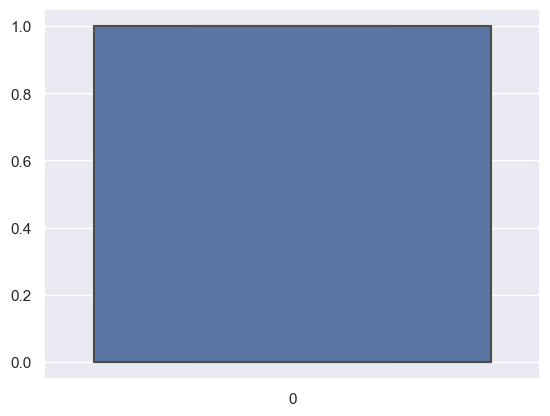

******************************************************************************************
Day_of_week_mon



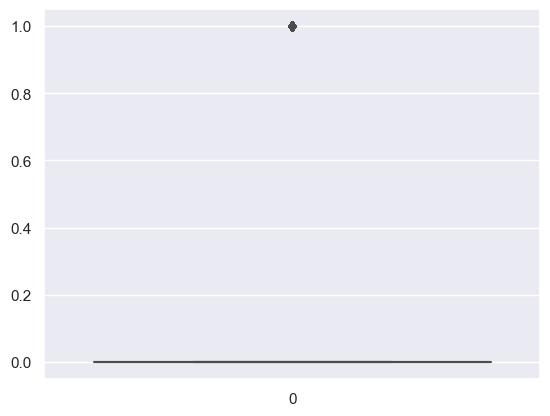

******************************************************************************************
Day_of_week_sat



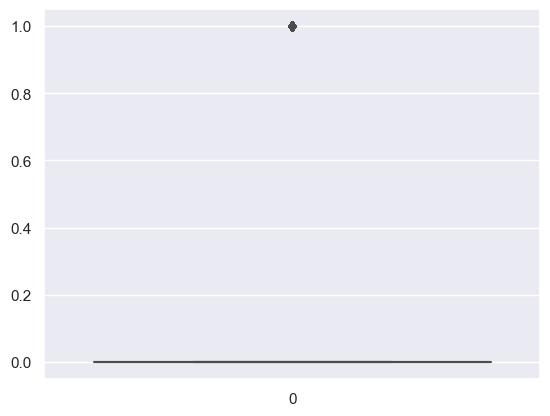

******************************************************************************************
Day_of_week_sun



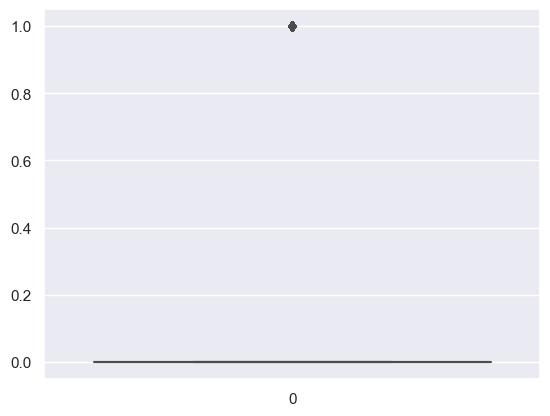

******************************************************************************************
Day_of_week_thu



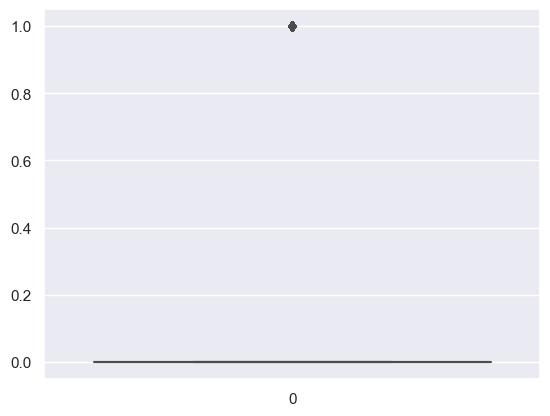

******************************************************************************************
Day_of_week_tue



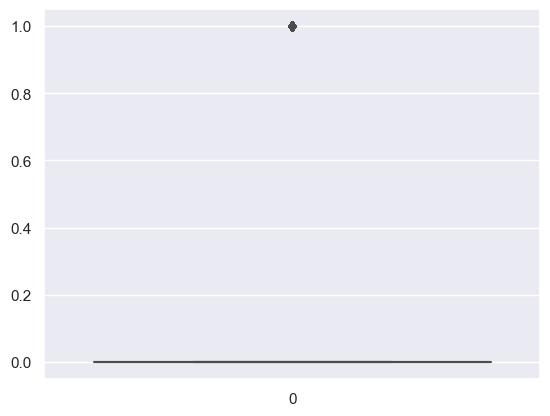

******************************************************************************************
Day_of_week_wed



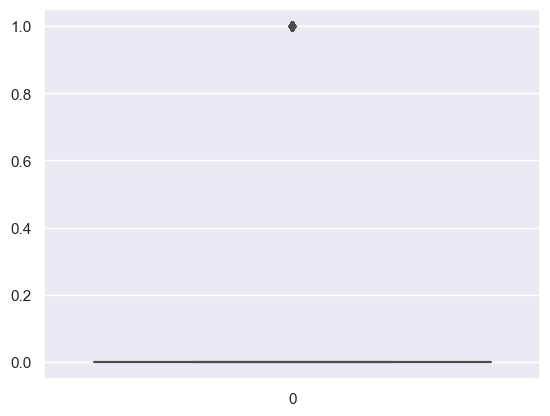

******************************************************************************************
Time_pm



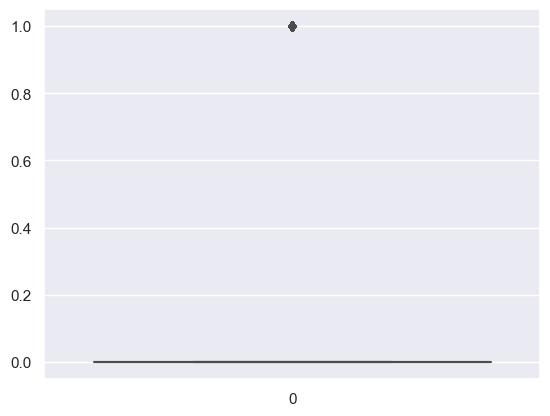

******************************************************************************************
Category_cycling



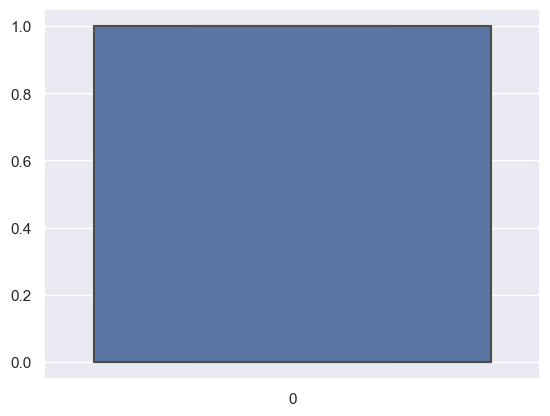

******************************************************************************************
Category_hiit



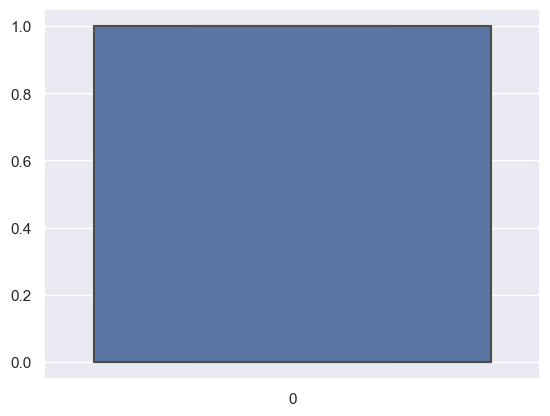

******************************************************************************************
Category_strength



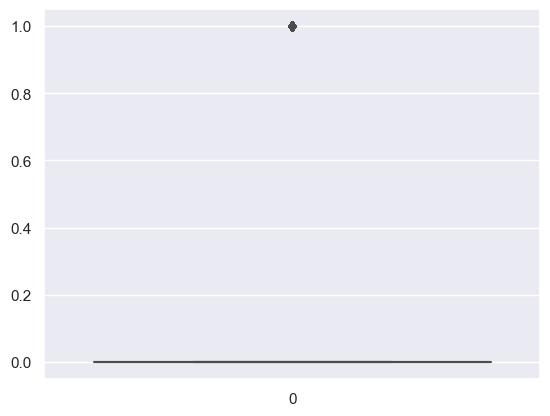

******************************************************************************************
Category_yoga



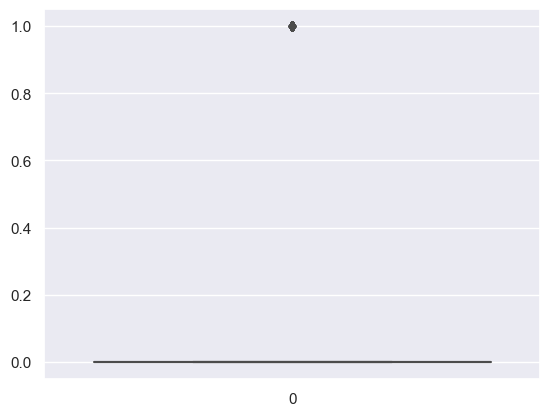

******************************************************************************************


In [38]:
def boxplot(columns):
    sns.boxplot(df3[columns])
for i in list(df3.columns):
    print(i.capitalize())
    print()
    boxplot(i)
    plt.show()
    print('*********'*10)

In [39]:
# Multicollinearity

In [40]:
x = df3.drop(columns = ['attended'])

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = []
for i in range(len(x.columns)):
    vif.append(variance_inflation_factor(x,i))
    

vif_df = pd.DataFrame(data = {'Columns' :list(x.columns),"VIF" :vif})
vif_df       
#pd.DataFrame

,Columns,VIF
0,months_as_member,4.855886
1,weight,49.839425
2,days_before,59.356783
3,day_of_week_Mon,7.588716
4,day_of_week_Sat,2.216570
5,day_of_week_Sun,3.739882
6,day_of_week_Thu,2.140323
7,day_of_week_Tue,4.648333
8,day_of_week_Wed,2.081424
9,time_PM,1.603521


In [42]:
# Since days_before have 59.356783 VIF,lets remove it
print(df3.shape)
df3 = df3.drop(columns = ['days_before'])
print(df3.shape)


(1367, 15)
(1367, 14)


In [43]:
x = df3.drop(columns = ['attended'])
vif = []
for i in range(len(x.columns)):
    vif.append(variance_inflation_factor(x,i))
    

vif_df = pd.DataFrame(data = {'Columns' :list(x.columns),"VIF" :vif})
vif_df       
#pd.DataFrame

,Columns,VIF
0,months_as_member,3.770880
1,weight,16.627438
2,day_of_week_Mon,1.706664
3,day_of_week_Sat,1.616005
4,day_of_week_Sun,1.688847
5,day_of_week_Thu,1.861671
6,day_of_week_Tue,1.737022
7,day_of_week_Wed,1.525408
8,time_PM,1.571161
9,category_Cycling,5.209283


In [44]:
# Since weight have 16.627438 VIF,lets remove it
print(df3.shape)
df3 = df3.drop(columns = ['weight'])
print(df3.shape)


(1367, 14)
(1367, 13)


In [45]:
x = df3.drop(columns = ['attended'])
vif = []
for i in range(len(x.columns)):
    vif.append(variance_inflation_factor(x,i))
    

vif_df = pd.DataFrame(data = {'Columns' :list(x.columns),"VIF" :vif})
vif_df       
#pd.DataFrame

,Columns,VIF
0,months_as_member,3.756225
1,day_of_week_Mon,1.589740
2,day_of_week_Sat,1.542397
3,day_of_week_Sun,1.604877
4,day_of_week_Thu,1.762531
5,day_of_week_Tue,1.678408
6,day_of_week_Wed,1.491501
7,time_PM,1.567496
8,category_Cycling,2.438174
9,category_HIIT,3.317421


In [46]:
## No Multicollinearity now

## Scaling

In [47]:
df3.describe()

,months_as_member,attended,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,time_PM,category_Cycling,category_HIIT,category_Strength,category_Yoga
count,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000
mean,13.168252,0.267740,0.152890,0.132407,0.141185,0.163131,0.129481,0.076079,0.240673,0.255304,0.446964,0.158010,0.087783
std,7.231950,0.442943,0.360013,0.339056,0.348340,0.369620,0.335854,0.265222,0.427649,0.436191,0.497361,0.364884,0.283083
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,35.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
# So columns months_as_member seems to have range in about 0-35, So i am scaling that column only 
# as other columns have binary values

In [49]:
df4 = df3.copy()

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()
df4['months_as_member'] = scaler.fit_transform(df4[['months_as_member']])


In [52]:
df4.describe()

,months_as_member,attended,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,time_PM,category_Cycling,category_HIIT,category_Strength,category_Yoga
count,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000
mean,0.357890,0.267740,0.152890,0.132407,0.141185,0.163131,0.129481,0.076079,0.240673,0.255304,0.446964,0.158010,0.087783
std,0.212704,0.442943,0.360013,0.339056,0.348340,0.369620,0.335854,0.265222,0.427649,0.436191,0.497361,0.364884,0.283083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.205882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.323529,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Imbalance target variable

In [53]:
df4['attended'].value_counts()

0    1001
1     366
Name: attended, dtype: int64

In [54]:
df4.shape

(1367, 13)

In [55]:
# Using randomoversample

In [56]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(df4.drop(columns='attended'),df4['attended'],test_size=0.2,random_state=1)

In [57]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
xTrain, yTrain = sampler.fit_resample(df4.drop(columns='attended'), df4['attended'])

In [60]:
yTrain.value_counts()

0    1001
1    1001
Name: attended, dtype: int64

## Model training

In [58]:
from sklearn.metrics import accuracy_score
#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
md1 = lr.fit(xTrain,yTrain)
pred1 = md1.predict(xTest)
acc1 = accuracy_score(pred1,yTest)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
md2 = dt.fit(xTrain,yTrain)
pred2 = md2.predict(xTest)
acc2 = accuracy_score(pred2,yTest)

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
md3 = rf.fit(xTrain,yTrain)
pred3 = md3.predict(xTest)
acc3 = accuracy_score(pred3,yTest)

# Bagging Classifier
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier()
md4 = bg.fit(xTrain,yTrain)
pred4 = md4.predict(xTest)
acc4 = accuracy_score(pred4,yTest)

#SVM
from sklearn.svm import SVC

svm = SVC()
md5 = svm.fit(xTrain,yTrain)
pred5 = md5.predict(xTest)
acc5 = accuracy_score(pred5,yTest)

#KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
md6 = knn.fit(xTrain,yTrain)
pred6 = md6.predict(xTest)
acc6 = accuracy_score(pred6,yTest)


#BernouliNB
from sklearn.naive_bayes import GaussianNB, BernoulliNB
bnb = BernoulliNB(alpha = 5,fit_prior = False)
md7 = bnb.fit(xTrain,yTrain)
pred7 = bnb.predict(xTest)
acc7 = accuracy_score(pred7,yTest)


# Voting Classifier
from sklearn.ensemble import VotingClassifier


vc = VotingClassifier(estimators = [('lr',lr),('dt',dt),('rf',rf),('bg',bg),('svm',svm),('knn',knn),('bnb',bnb)])
md8 = vc.fit(xTrain,yTrain)
pred8 = md8.predict(xTest)
acc8 = accuracy_score(pred8,yTest)

#Train score
ac1 = accuracy_score(md1.predict(xTrain),yTrain)
ac2 = accuracy_score(md2.predict(xTrain),yTrain)
ac3 = accuracy_score(md3.predict(xTrain),yTrain)
ac4 = accuracy_score(md4.predict(xTrain),yTrain)
ac5 = accuracy_score(md5.predict(xTrain),yTrain)
ac6 = accuracy_score(md6.predict(xTrain),yTrain)
ac7 = accuracy_score(md7.predict(xTrain),yTrain)
ac8 = accuracy_score(md8.predict(xTrain),yTrain)


In [59]:
#Normal

l1 = ['Logistic Regression', 'Decision Tree', 'Random Forest Classifier' , 'Bagging Classifier', 'SVM', 'KNN','BernouliNB', 'Voting Classifier']
scorecard = pd.DataFrame(data = {"Models": l1,'Train_score':[ac1,ac2,ac3,ac4,ac5,ac6,ac7,ac8],'Test_score': [acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8]})
scorecard.set_index('Models',inplace = True)
scorecard

,Train_score,Test_score
Models,,
Logistic Regression,0.722278,0.697080
Decision Tree,0.915584,0.897810
Random Forest Classifier,0.915584,0.875912
Bagging Classifier,0.908591,0.883212
SVM,0.740759,0.708029
KNN,0.800699,0.770073
BernouliNB,0.552448,0.423358
Voting Classifier,0.870629,0.817518


## Decision Tree Classfier

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

dt = DecisionTreeClassifier()
md2 = dt.fit(xTrain,yTrain)
pred2 = md2.predict(xTest)
acc2 = accuracy_score(pred2,yTest)
acc_train = accuracy_score(md2.predict(xTrain),yTrain)

recall_train = recall_score(md2.predict(xTrain),yTrain)
recall_test = recall_score(md2.predict(xTest),yTest)

print('Recall Score\n')
print('Train ',recall_train)
print('Test ',recall_test)

print()

print('Accuracy Score\n')
print('Train ',acc_train)
print('Test ',acc2)

Recall Score

Train  0.9653243847874721
Test  0.8979591836734694

Accuracy Score

Train  0.9155844155844156
Test  0.8978102189781022


## RandomForest Classfier

In [63]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
md3 = rf.fit(xTrain,yTrain)
pred3 = md3.predict(xTest)
acc3 = accuracy_score(pred3,yTest)

acc_train = accuracy_score(md3.predict(xTrain),yTrain)

recall_train = recall_score(md3.predict(xTrain),yTrain)
recall_test = recall_score(md3.predict(xTest),yTest)

print('Recall Score\n')
print('Train ',recall_train)
print('Test ',recall_test)

print()

print('Accuracy Score\n')
print('Train ',acc_train)
print('Test ',acc2)

Recall Score

Train  0.9202020202020202
Test  0.7162162162162162

Accuracy Score

Train  0.9155844155844156
Test  0.8978102189781022


## Bagging Classfier

In [64]:
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier()
md4 = bg.fit(xTrain,yTrain)
pred4 = md4.predict(xTest)
acc4 = accuracy_score(pred4,yTest)

acc_train = accuracy_score(md4.predict(xTrain),yTrain)

recall_train = recall_score(md4.predict(xTrain),yTrain)
recall_test = recall_score(md4.predict(xTest),yTest)

print('Recall Score\n')
print('Train ',recall_train)
print('Test ',recall_test)

print()

print('Accuracy Score\n')
print('Train ',acc_train)
print('Test ',acc2)

Recall Score

Train  0.9268547544409613
Test  0.765625

Accuracy Score

Train  0.9080919080919081
Test  0.8978102189781022


## Since Decision Tree is the real winner in terms of recall score

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

print('Decison Tree\nTest Score:\n',classification_report(md2.predict(xTest),yTest))
print()
print('********'*15)
print('Decison Tree\nTrain Score:\n',classification_report(md2.predict(xTrain),yTrain))

Decison Tree
Test Score:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94       225
           1       0.66      0.90      0.76        49

    accuracy                           0.90       274
   macro avg       0.82      0.90      0.85       274
weighted avg       0.92      0.90      0.90       274


************************************************************************************************************************
Decison Tree
Train Score:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92      1108
           1       0.86      0.97      0.91       894

    accuracy                           0.92      2002
   macro avg       0.92      0.92      0.92      2002
weighted avg       0.92      0.92      0.92      2002



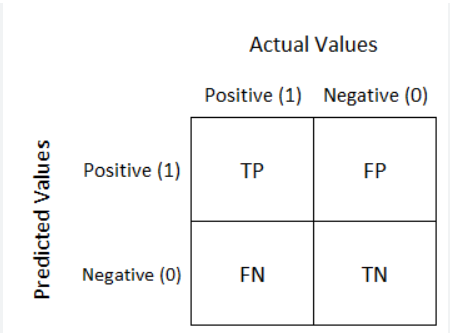

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

print('Decison Tree\nTest Score:\n',confusion_matrix(md2.predict(xTest),yTest))
print()
print('********'*15)
print('Decison Tree\nTrain Score:\n',confusion_matrix(md2.predict(xTrain),yTrain))

Decison Tree
Test Score:
 [[202  23]
 [  5  44]]

************************************************************************************************************************
Decison Tree
Train Score:
 [[970 138]
 [ 31 863]]


In [74]:
from sklearn.metrics import roc_curve, auc

fpr,tpr,thresholds = roc_curve(yTest, md2.predict(xTest))

auc1 = auc(fpr,tpr)

print('AUC', auc1)



AUC 0.8162809142692337


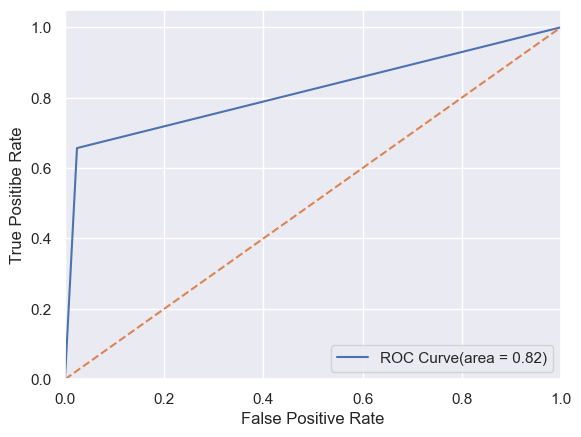

In [78]:
plt.plot(fpr,tpr, label = 'ROC Curve(area = {:.2f})'.format(auc1))
plt.plot([0,1],[0,1],linestyle = '--')

plt.xlim([0,1])
plt.ylim([0,1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positibe Rate')
plt.legend(loc = 'lower right')
plt.show()